# A/B Testing: Optimizing Digital Marketing Campaigns
### Objectives:
to determine if the **'Conversion'** focused campaign leads to a statistically significant increase in conversion rates compared to the baseline **'Awareness'** campaign.
### key metrics:
**Primary Metric:** Conversion Rate(Conversions/Total Users)
**Significance Level(Alpha):** 0.05(95% confidence)

In [1]:
import pandas as pd

#loading dataset
df= pd.read_csv('digital_marketing_campaign_dataset.csv')

#checking first few rows and column details
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [2]:
#for checking missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

#checking duplicate customer IDs
duplicate_count=df.duplicated('CustomerID').sum()
print("\n number of duplicate customer IDs: {duplicate_count}")

#Viewing the unique values in campaign type
print("\n Campaign Types Identified:")
print(df['CampaignType'].unique())

Missing values per column:
CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

 number of duplicate customer IDs: {duplicate_count}

 Campaign Types Identified:
['Awareness' 'Retention' 'Conversion' 'Consideration']


In [3]:
#filtering data for only Awareness and Conversion groups
ab_data= df[df['CampaignType'].isin(['Awareness','Conversion'])]

#Calculating conversion rates for both groups
stats= ab_data.groupby('CampaignType')['Conversion'].agg(['count','mean','sum'])
stats.columns=['Total_Users','Conversion_Rate','Total_Conversions']

print("summary statitics for A/B test:")
print(stats)

summary statitics for A/B test:
              Total_Users  Conversion_Rate  Total_Conversions
CampaignType                                                 
Awareness            1988         0.855634               1701
Conversion           2077         0.933558               1939


In [4]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

#preparing the successes for the test
successes = stats['Total_Conversions']
nobs=stats['Total_Users']

#preparing the Z-test to get the p-value
z_stat, p_val = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat),(upper_con,upper_treat)= proportion_confint(successes, nobs=nobs,alpha=0.05)

#calculating confidence intervals
print(f'Z-statistic: {z_stat:.2f}')
print(f'P-value:{p_val:4f}')

Z-statistic: -8.12
P-value:0.000000


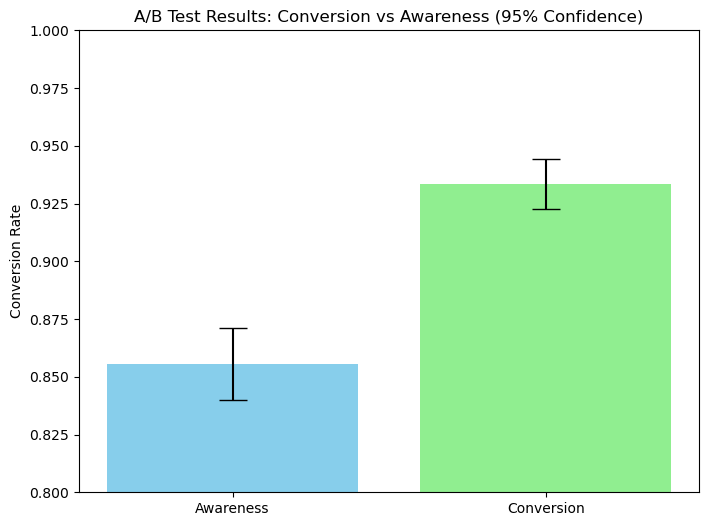

In [5]:
import matplotlib.pyplot as plt

# preparing data for the plot
groups=['Awareness','Conversion']
rates=[0.8556,0.9335]
errors= [(upper_con-lower_con)/2 , (upper_treat-lower_treat)/2]

#Creating the bar chart with error bars
plt.figure(figsize=(8,6))
plt.bar(groups,rates,yerr=errors,capsize=10,color=['skyblue','lightgreen'])

#adding labels and a title
plt.ylim(0.80,1.0) # zoom in to see the difference clearly
plt.ylabel('Conversion Rate')
plt.title('A/B Test Results: Conversion vs Awareness (95% Confidence)')
plt.show()

## Final Analysis and Business Recommendation

### Statistical Results:
**Control Group(Awareness):** 85.5% Conversion Rate
**Test Group(Conversion):** 93.3% Conversion Rate
**P-Value:** 0.000(Statistically Significant)

### Conclusion:
Since the P-value is less than 0.05, we **reject the Null Hypnothesis**. There is a 9.1% relative lift in conversion when using the 'Conversion' Strategy

### Recommendation: 
I recommend the marketing team reallocate budget from 'Awareness' to 'Conversion' campaign, as the data proves this strategy significantly increases user sign-ups with 95% certainty 